## Setup

In [26]:
import pandas as pd
import numpy as np
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [60]:
from functions import load_taxonomy
from functions import load_both
X, y = load_taxonomy(boolean=False)
X_both, y_both = load_both()
display(X)
display(y)

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                        0.0   
                SAMD00036193                                        0.0   
                SAMD00036194                                        0.0   
                SAMD00036197                                        0.0   
                SAMD00036204                                        0.0   
...                                                                 ...   
N5              SRR5279310                                          0.0   
                SRR5279311                                          0.0   
                SRR5279312                                          0.0   
                SRR5279313                                          0.0   
V1              rhb_ram_0040                                        0.0   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                        0.000004   
                SAMD00036193                                        0.000000   
                SAMD00036194                                        0.000000   
                SAMD00036197                                        0.000000   
                SAMD00036204                                        0.000000   
...                                                                      ...   
N5              SRR5279310                                          0.000000   
                SRR5279311                                          0.000000   
                SRR5279312                                          0.000000   
                SRR5279313                                          0.000000   
V1              rhb_ram_0040                                        0.000000   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                            0.0   
                SAMD00036193                                            0.0   
                SAMD00036194                                            0.0   
                SAMD00036197                                            0.0   
                SAMD00036204                                            0.0   
...                                                                     ...   
N5              SRR5279310                                              0.0   
                SRR5279311                                              0.0   
                SRR5279312                                              0.0   
                SRR5279313                                              0.0   
V1              rhb_ram_0040                                            0.0   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                      0.003491   
                SAMD00036193                                      0.000110   
                SAMD00036194                                      0.000004   
                SAMD00036197                                      0.000435   
                SAMD00036204                                      0.001297   
...                                                                    ...   
N5              SRR5279310                                        0.000000   
                SRR5279311                                        0.000000   
                SRR5279312                                        0.000000   
                SRR5279313                                        0.000106   
V1              rhb_ram_0040                                      

Phenotype
Study Accession Sample Accession or Sample ID           
PRJDB3601       SAMD00036192                        True
                SAMD00036193                        True
                SAMD00036194                       False
                SAMD00036197                        True
                SAMD00036204                        True
...                                                  ...
N5              SRR5279310                         False
                SRR5279311                         False
                SRR5279312                         False
                SRR5279313                         False
V1              rhb_ram_0040                       False

[5026 rows x 1 columns]

s__Akkermansia_muciniphila


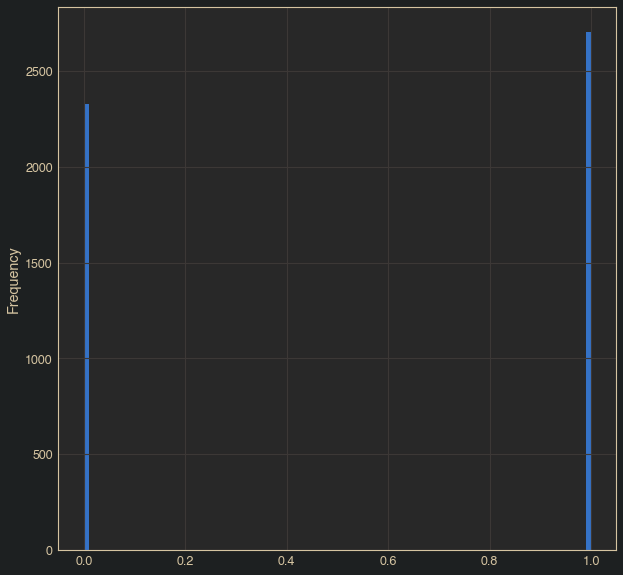

In [74]:
import matplotlib.pyplot as plt
# plt.subplots(figsize=(10, 10))
idx = 10
print(X.columns[idx])
# X.iloc[:, idx].plot.hist(bins=100)
# plt.savefig(config.OUTPUT_DIR + "sample_hist.png")
plt.subplots(figsize=(10, 10))
((X > 0) * 1.0).iloc[:, idx].plot.hist(bins=100)
plt.savefig(config.OUTPUT_DIR + "tranformed_hist.png")

In [28]:
from functions import get_groups
groups = get_groups(X)
np.unique(groups)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np

In [30]:
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
logo = LeaveOneGroupOut()
loo = LeaveOneOut()

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
minmax = MinMaxScaler()
standard = StandardScaler()
binary = Binarizer(0.00001)

## Fit and score on training set

In [56]:
C = 1

print("C parameter:", C)
logreg = LogisticRegression(C=C, penalty='l1',
fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=0)
pipe = make_pipeline(binary, logreg)
pipe.fit(X_both, y_both.values.ravel())
y_hat = pipe.predict(X_both)
print(balanced_accuracy_score(y_both, y_hat))

C parameter: 1
0.8152575652575653


In [38]:
max_features = int(((len(y) - y.sum()) * 0.9) / 10)
max_features

204

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
transformed = poly.fit_transform(X)
X_poly = pd.DataFrame(transformed, index=X.index, columns=poly.get_feature_names(X.columns))
X_poly

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                        0.0   
                SAMD00036193                                        0.0   
                SAMD00036194                                        0.0   
                SAMD00036197                                        0.0   
                SAMD00036204                                        0.0   
...                                                                 ...   
N5              SRR5279310                                          0.0   
                SRR5279311                                          0.0   
                SRR5279312                                          0.0   
                SRR5279313                                          0.0   
V1              rhb_ram_0040                                        0.0   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                             0.0   
                SAMD00036193                                             0.0   
                SAMD00036194                                             0.0   
                SAMD00036197                                             0.0   
                SAMD00036204                                             0.0   
...                                                                      ...   
N5              SRR5279310                                               0.0   
                SRR5279311                                               0.0   
                SRR5279312                                               0.0   
                SRR5279313                                               0.0   
V1              rhb_ram_0040                                             0.0   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                            0.0   
                SAMD00036193                                            0.0   
                SAMD00036194                                            0.0   
                SAMD00036197                                            0.0   
                SAMD00036204                                            0.0   
...                                                                     ...   
N5              SRR5279310                                              0.0   
                SRR5279311                                              0.0   
                SRR5279312                                              0.0   
                SRR5279313                                              0.0   
V1              rhb_ram_0040                                            0.0   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                           1.0   
                SAMD00036193                                           1.0   
                SAMD00036194                                           0.0   
                SAMD00036197                                           1.0   
                SAMD00036204                                           1.0   
...                                                                    ...   
N5              SRR5279310                                             0.0   
                SRR5279311                                             0.0   
                SRR5279312                                             0.0   
                SRR5279313                                             1.0   
V1              rhb_ram_0040                                      

In [59]:
from sklearn.feature_selection import SelectKBest, chi2
k = SelectKBest(chi2, k=1000)
k.fit(X_poly, y)
X_new = X_poly.iloc[:, k.get_support()]
X_new

s__Atopobium_parvulum  \
Study Accession Sample Accession or Sample ID                          
PRJDB3601       SAMD00036192                                     0.0   
                SAMD00036193                                     0.0   
                SAMD00036194                                     0.0   
                SAMD00036197                                     1.0   
                SAMD00036204                                     0.0   
...                                                              ...   
N5              SRR5279310                                       0.0   
                SRR5279311                                       0.0   
                SRR5279312                                       0.0   
                SRR5279313                                       0.0   
V1              rhb_ram_0040                                     0.0   

                                               s__Bifidobacterium_adolescentis  \
Study Accession Sample Accession or Sample ID                                    
PRJDB3601       SAMD00036192                                               1.0   
                SAMD00036193                                               1.0   
                SAMD00036194                                               1.0   
                SAMD00036197                                               1.0   
                SAMD00036204                                               1.0   
...                                                                        ...   
N5              SRR5279310                                                 1.0   
                SRR5279311                                                 0.0   
                SRR5279312                                                 1.0   
                SRR5279313                                                 1.0   
V1              rhb_ram_0040                                               1.0   

                                               s__Bifidobacterium_angulatum  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                            0.0   
                SAMD00036193                                            0.0   
                SAMD00036194                                            0.0   
                SAMD00036197                                            0.0   
                SAMD00036204                                            0.0   
...                                                                     ...   
N5              SRR5279310                                              0.0   
                SRR5279311                                              0.0   
                SRR5279312                                              0.0   
                SRR5279313                                              0.0   
V1              rhb_ram_0040                                            0.0   

                                               s__Bifidobacterium_catenulatum  \
Study Accession Sample Accession or Sample ID                                   
PRJDB3601       SAMD00036192                                              1.0   
                SAMD00036193                                              1.0   
                SAMD00036194                                              0.0   
                SAMD00036197                                              0.0   
                SAMD00036204                                              0.0   
...                                                                       ...   
N5              SRR5279310                                                0.0   
                SRR5279311                                                0.0   
                SRR5279312                                                0.0   
                SRR5279313                                                0.0   
V1              rhb_ram_0040               

In [57]:
X_new.sum().sum() / (X_new.shape[0] * X_new.shape[1])

0.18484773745214977

In [58]:
C = 1

print("C parameter:", C)
logreg = LogisticRegression(C=C, penalty='l1',
fit_intercept=True, max_iter=3000, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=0)
# rand = RandomForestClassifier(random_state=42, n_estimators=1200, max_depth=None, max_features=None)
# pipe = make_pipeline(minmax, logreg)
scores = cross_val_score(logreg, X_new, y, # groups=groups, 
                         cv=strat, n_jobs=-1, verbose=10, scoring="balanced_accuracy",
                        )
print(scores.mean())

C parameter: 1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   18.8s remaining:   43.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.5s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   25.3s remaining:   10.9s


0.7231864493685329


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.4s finished


In [7]:
import GMHI
import importlib
importlib.reload(GMHI)
gmhi = GMHI.GMHI(use_shannon=False, theta_f=1.9, theta_d=0)
gmhi.fit(X_both.values, y_both.values)
balanced_accuracy_score(y_both.values, gmhi.predict(X_both.values))

0.7127656502656503

In [67]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty='l1',
fit_intercept=True, max_iter=3000, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=0)
gmhi = GMHI(use_shannon=False)
parameters_logreg = {'C' : [0.1, 0.3, 1, 3, 10]}
parameters_gmhi = {'theta_f' : [1.8, 1.9, 2.0], 
                   'theta_d' : [0, 0.05]}
clf = GridSearchCV(gmhi, parameters_gmhi, cv=logo, scoring='balanced_accuracy')
clf.fit(X_both, y_both, groups=groups)
best_parameters = clf.best_estimator_.get_params()
print(best_parameters)
best_score = clf.best_score_
print(best_score)

{'theta_d': 0, 'theta_f': 1.8, 'use_shannon': False}
0.5646402069705626


## Plot study scores from logocv

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_study_scores(y, scores):
    groupby = y.groupby(y.index.get_level_values(0))
    df = groupby.count()
    df.columns = ['count']
    df['num_healthy'] = groupby.sum()
    df['num_unhealthy'] = df['count'] - df['num_healthy']
    df['test_p_h'] = scores['test_p_h']
    df['test_p_n'] = scores['test_p_n']
    df['test_bal'] = scores['test_bal']
    df['group'] = list(range(42))
    
    # preprocessing for healthy plot
    sorted_healthy = df.sort_values('num_healthy').copy()
    sorted_healthy = sorted_healthy[sorted_healthy['num_healthy'] > 0]
    num_healthy = sorted_healthy['num_healthy'].sum()
    num_healthy_correct = (sorted_healthy['num_healthy'] * sorted_healthy['test_p_h']).sum()
    overall_acc_healthy = num_healthy_correct / num_healthy
    dict1 = {"group" : "avg.\nacc", "test_p_h" : sorted_healthy['test_p_h'].mean()}
    dict2 = {"group" : "ovr.\nacc", "test_p_h" : overall_acc_healthy}
    sorted_healthy = sorted_healthy.append(dict1, ignore_index=True)
    sorted_healthy = sorted_healthy.append(dict2, ignore_index=True)

    # preprocessing for unhealthy groups
    sorted_unhealthy = df.sort_values('num_unhealthy').copy()
    sorted_unhealthy = sorted_unhealthy[sorted_unhealthy['num_unhealthy'] > 0]
    num_unhealthy = sorted_unhealthy['num_unhealthy'].sum()
    num_unhealthy_correct = (sorted_unhealthy['num_unhealthy'] * sorted_unhealthy['test_p_n']).sum()
    overall_acc_unhealthy = num_unhealthy_correct / num_unhealthy
    dict1 = {"group" : "avg.\nacc", "test_p_n" : sorted_unhealthy['test_p_n'].mean()}
    dict2 = {"group" : "ovr.\nacc", "test_p_n" : overall_acc_unhealthy}
    sorted_unhealthy = sorted_unhealthy.append(dict1, ignore_index=True)
    sorted_unhealthy = sorted_unhealthy.append(dict2, ignore_index=True)
    
    # preprocessing for all groups
    sorted_all = df.sort_values('count').copy()
    num_samples = sorted_all['count'].sum()
    overall_acc = (num_healthy_correct + num_unhealthy_correct) / (num_samples)
    print(overall_acc)
    dict1 = {"group" : "avg.", "test_bal" : sorted_all['test_bal'].mean()}
    dict2 = {"group" : "ovr.\nacc", "test_bal" : overall_acc}
    sorted_all = sorted_all.append(dict1, ignore_index=True)
    sorted_all = sorted_all.append(dict2, ignore_index=True)
    
    # plot healthy
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.barplot(data=sorted_healthy, x='group', y='test_p_h', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_healthy.png")
    
    # plot unhealthy
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.barplot(data=sorted_unhealthy, x='group', y='test_p_n', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Non-healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_unhealthy.png")
    
    # plot all
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.barplot(data=sorted_all, x='group', y='test_bal', palette='crest')
    plt.xlabel("Group", fontsize=30)
    plt.ylabel("Balanced Accuracy", fontsize=30)
    plt.title("All Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_all.png")

0.6171906088340628


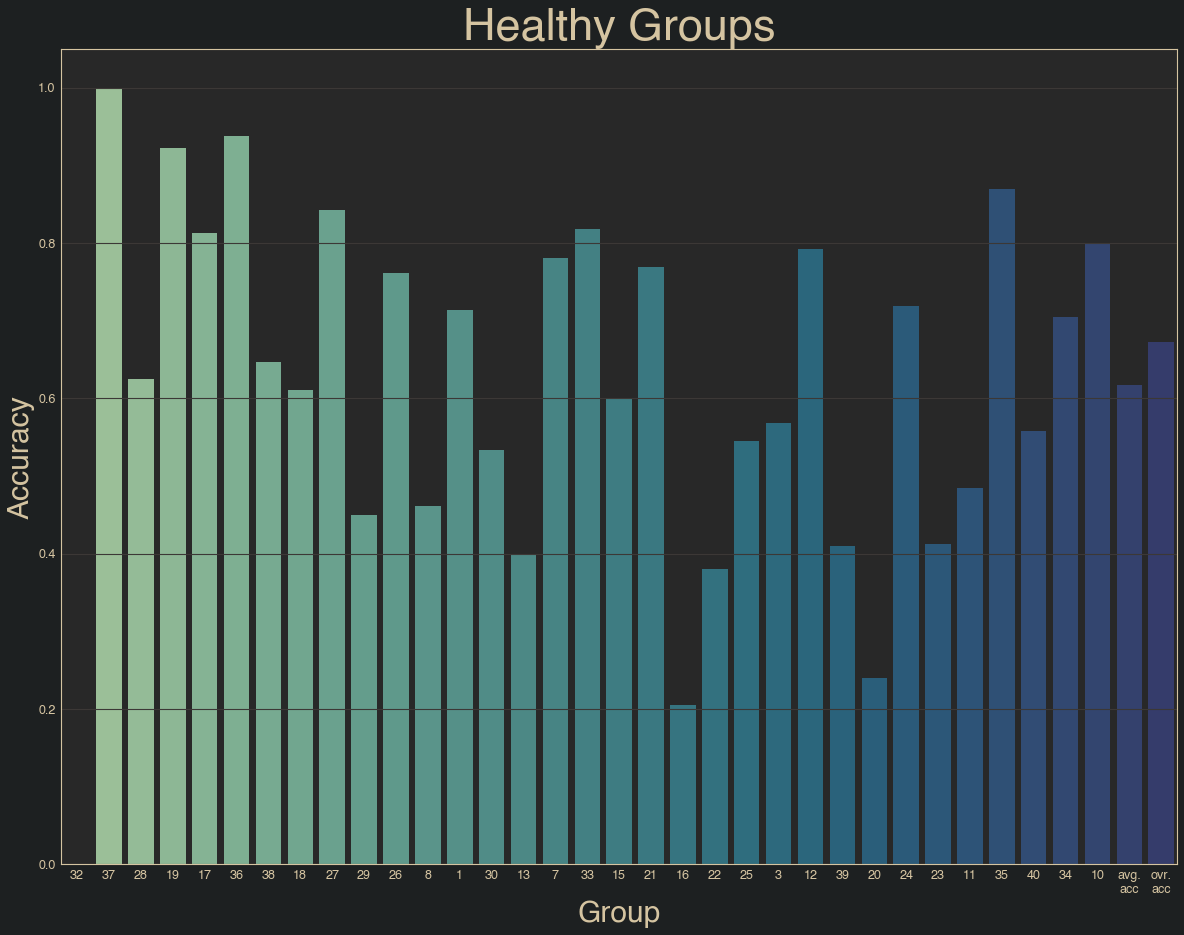

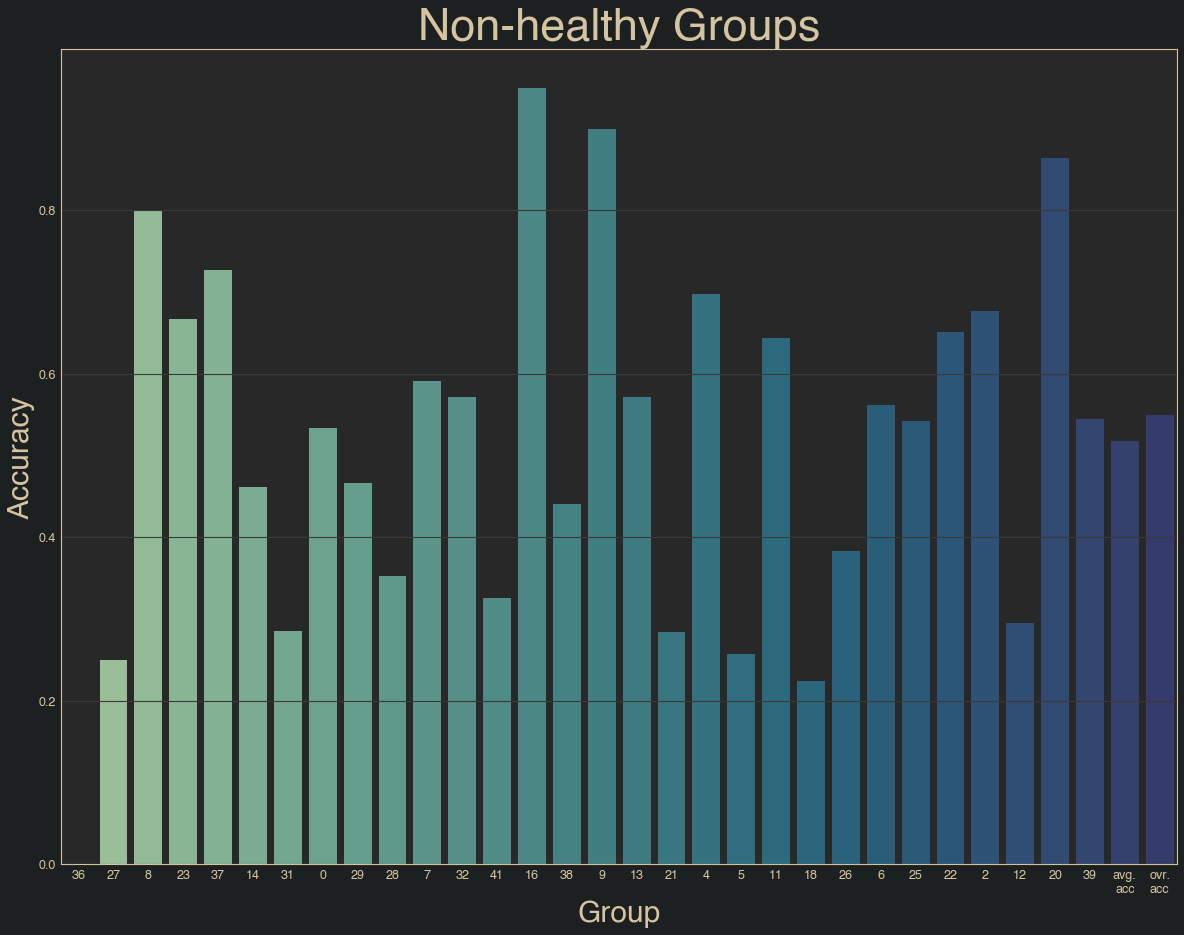

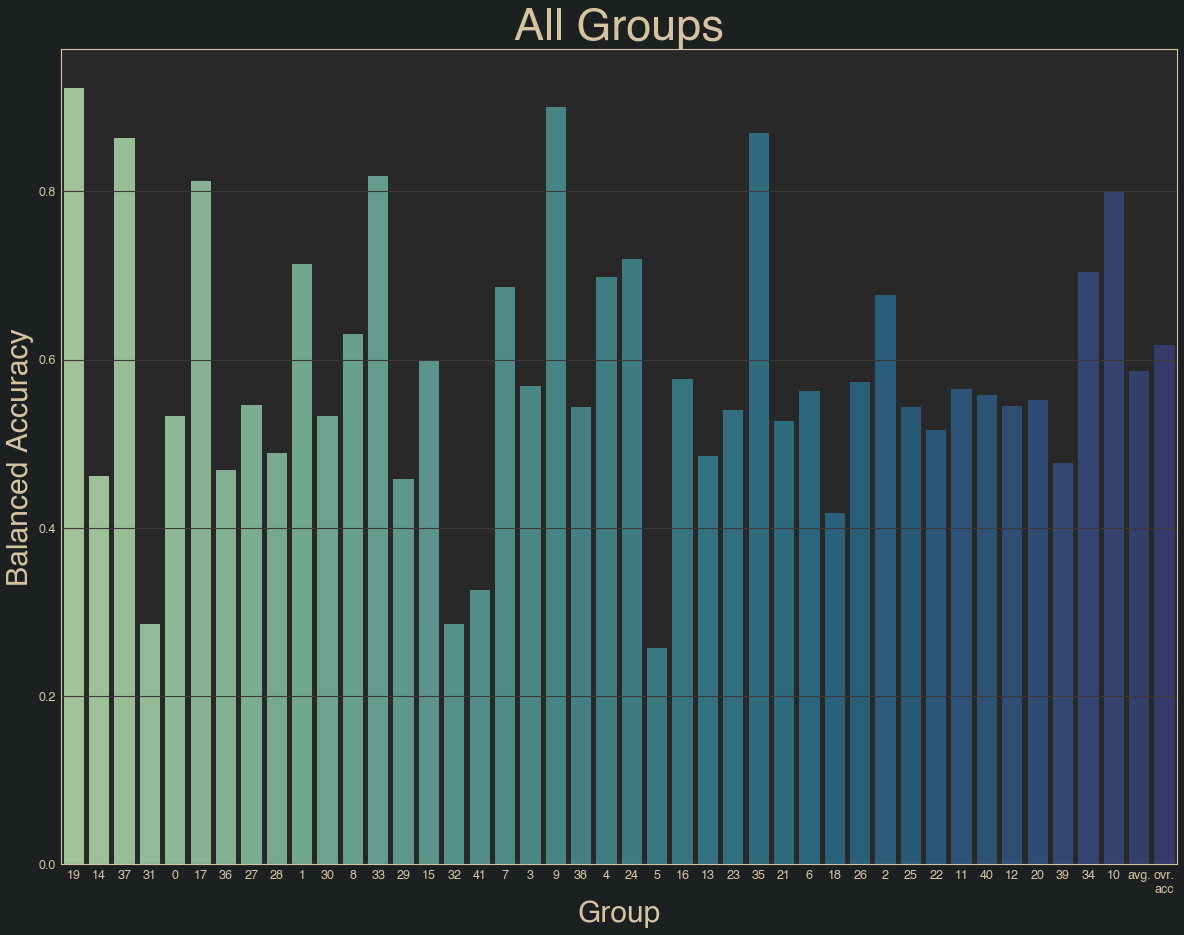

In [87]:
plot_study_scores(y, scores)

In [54]:
def get_coef(logreg, X):
    """
    Returns dataframe with coefficients and features
    """
    df = pd.DataFrame(logreg.coef_[0], index=X.columns, columns=['coef'])
    return df.sort_values('coef', ascending=False)

In [55]:
coef = get_coef(logreg, X)
coef

,coef
s__Varibaculum_cambriense,1.385461
s__Bifidobacterium_angulatum,1.204982
s__Faecalibacterium_prausnitzii,1.028229
s__Lactobacillus_acidophilus,1.015642
s__Atopobium_rimae,0.831658
...,...
s__Fusobacterium_gonidiaformans,-0.842945
s__Streptococcus_peroris,-1.095045
s__Clostridium_methylpentosum,-1.115442
s__Lactobacillus_reuteri,-1.324824


In [56]:
coef.to_csv(config.OUTPUT_DIR + "coefficients.csv")